#Análisis de documentos PDF

<i>Análisis y procesamiento inteligente de textos</i>

<i>Brugada Hernández Daniel</i>

## Lectura del documento PDF

In [6]:
#Importamos las librerias a utilizar
import PyPDF2
from PyPDF2 import PdfFileReader
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Abre una ventana donde podemos seleccionar el documetno PDF
Tk().withdraw() 
filename = askopenfilename(defaultextension=".pdf", filetypes=[('pdf file', '*.pdf')])

In [11]:
#Seleccionamos el idioma del documento 
idioma = "spanish"

In [12]:
#Creamos el objeto pdf
pdf = open(filename,"rb")
#Creamos el objeto pdf reader
pdf_reader = PyPDF2.PdfFileReader(pdf)
#Verificamos el numero de paginas
num_pags = pdf_reader.numPages

caps = list(range(1, num_pags + 1))
data = {}

for  i in range (0, num_pags):
    #Creamos el objeto pagina
    page = pdf_reader.getPage(i)
    #Extraemos el texto de cada pagina
    data[i] = page.extractText()
#Creamos el dataset con pandas
data_combined = {key: [value] for (key, value) in data.items()}
pd.set_option('max_colwidth',340)
dataset = pd.DataFrame.from_dict(data_combined).transpose()
dataset.columns = ['texto']
dataset = dataset.sort_index()
dataset
#Cerrramos el documento pdf
pdf.close()

In [13]:
#Mostramos los datos extraidos del PDF en el dataframe
dataset

,texto
0,"\n \n1\n \n \n \nVolaris reporta\n \nresultados del\n \nprimer\n \ntrimestre 20\n20\n:\n \n3.9\n% de margen de \nutilidad operativa, un incremento de \n3\n.\n5\n \npuntos porcentuales\n \ny\n \n2\n.\n1\n%\n \nde \nincremento en TRASM\n \nrespecto al mismo periodo del año anterior\n \n \nCiudad de Méx\nico, \nMéxico. 2\n3\n \nde\n \na..."
1,"\n \n2\n \n \n \n\n \nL\na \nutilidad\n \nde operación fue Ps.\n308\n \nmillones p\nara\n \nel\n \nprimer\n \ntrimestre, \nrepresentando \nuna mejor\nía,\n \ncomparada con la \nutilidad\n \nde operación de Ps.\n2\n6\n \nmillones\n,\n \nregistrada en el mismo periodo del año \nanterior. El margen de \nutilidad\n \noperativa \nen el\n ..."
2,"\n \n3\n \n \n \n\n \nSi bien nuestro negocio y la industria\n \nentera\n \nde aerolíneas han comenzado a experimentar impactos \nadversos materiales debido a COVID\n-\n19, a la fecha, \ntodavía\n \nno e\ns posible determinar cuándo \ndisminuirán \ndichos impactos, ni \nen qué medida \nafectará \naún más la demanda de viajes aéreos, ..."
3,"\n \n4\n \n \n \nReducción del costo total unitario\n \na pesar de\n \nla\n \nde\npreciación\n \ndel\n \npeso \n \n \n\n \nEn \nel\n \nprimer\n \ntrimestre\n \nde\n \n20\n20\n, el CASM y CASM\n \nex fuel\n \nfueron de Ps.1\n2\n4\n.\n1\n \ncentavos (EUA$\n5.28\n \ncentavos) y Ps.\n82.1\n \ncentavos (EUA$\n3\n.\n49\n \ncentavos), respe..."
4,"\n \n5\n \n \n \n\n \nAdicionalmente, durante 2019, la Compañía estableció coberturas respecto de una parte de su \npronóstico de gasto de combustible a través de un instrumento financiero no derivado, utilizando como \ninstrumento de cobertura una porción de sus activos monetarios\n \ndenominados en dólares. Esta \nrelación de cober..."
5,"\n \n6\n \n \nDetalle de conferencia telefónica/ Webcast:\n \nAcerca de Volaris:\n \n\naerolínea de ultra\n-\n\n\ntarifas base bajas para estimular el mercado, ofreciendo servicio de calidad al cliente y una vasta opción de productos. Desd\ne que \ncomenzó a operar en marzo del 2006, Volaris ha in\ncrementado sus rutas de 5 a \n98\n ..."
6,"\n \n7\n \n \n \nControladora Vuela Compañía de Aviación, S.A.B. de C.V. y Subsidiarias\n \nIndicadores financieros y operativos\n \n \nCifras no auditadas\n \n(En pesos mexicanos a menos que se indique lo contrario)\n \nTres meses \nterminados el \n31 \nde\n \nmarzo\n \nde \n20\n20\n \n \n(EUA$)*\n \nTres meses \nterminados el \n \n..."
7,"\n \n8\n \n \n \n \n \nControladora Vuela Compañía de Aviación, S.A.B. de C.V. y Subsidiarias\n \nEstados Consolidados de \nResultados\n \n \nCifras no \nauditadas\n \n(En millones de pesos mexicanos) \n \nTres meses \nterminados el \n31 \nde\n \nmarzo\n \nde \n20\n20\n \n \n(EUA$)*\n \nTres meses \nterminados el \n \n31 d\ne marzo\n..."
8,"\n \n9\n \n \n \n \n \nControladora Vuela Compañía de Aviación, S.A.B. de C.V. \ny\n \nSubsidiari\nas\n \nConciliación de ingresos\n \ntotales\n \npor s\nervicios adicionales por pasajero\n \n \n \nLa siguiente tabla \nmuestra información detallada trimestral sobre los componentes del ingreso\n \ntotal\n \npor servicios \nadicionales..."
9,"\n \n10\n \n \nControladora Vuela Compañía de Aviación, S.\nA\n.B. de C.V. y Subsidiarias\n \nEstados Consolidados de Posición Financiera\n \n \n(En millones de pesos \nmexicanos)\n \nAl \n31 d\ne marzo\n \nde \n20\n20\n \n \nNo auditados \n \n(EUA$)*\n \nAl \n31 d\ne marzo\n \nde \n20\n20\n \nNo auditados\n \nAl 31 de diciembre \nde..."


## Limpieza de los datos

In [14]:
#FUncion de limpia el dataset
def limpieza(text):
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', '', text)
    return text
clean = lambda x: limpieza(x)

In [15]:
#Llamamos a la fucion para limpiar los datos y mostramos la salida
dataset= pd.DataFrame(dataset.texto.apply(clean))
dataset

,texto
0,volaris reporta resultados del primer trimestre de margen de utilidad operativa un incremento de puntos porcentuales y de incremento en trasm respecto al mismo periodo del año anterior ciudad de méxico méxico de abril de volaris nyse vlrs y bmv volar la aerolínea de ultra bajo costo que opera en méxico est...
1,la utilidad de operación fue ps millones para el primer trimestre representando una mejoría comparada con la utilidad de operación de ps millones registrada en el mismo periodo del año anterior el margen de utilidad operativa en el primer trimestre fue una mejora en el margen por puntos porcentuales con respecto al m...
2,si bien nuestro negocio y la industria entera de aerolíneas han comenzado a experimentar impactos adversos materiales debido a covid a la fecha todavía no es posible determinar cuándo disminuirán dichos impactos ni en qué medida afectará aún más la demanda de viajes aéreos lo que podría continuar afectando material y negati...
3,reducción del costo total unitario a pesar de la depreciación del peso en el primer trimestre de el casm y casm ex fuel fueron de ps centavos eua centavos y ps centavos eua centavos respectivamente estos representaron una disminución del y un incrementó del respectivamente comparado con el mismo trimest...
4,adicionalmente durante la compañía estableció coberturas respecto de una parte de su pronóstico de gasto de combustible a través de un instrumento financiero no derivado utilizando como instrumento de cobertura una porción de sus activos monetarios denominados en dólares esta relación de cobertura se designa como una cobert...
5,detalle de conferencia telefónica webcast acerca de volaris aerolínea de ultra tarifas base bajas para estimular el mercado ofreciendo servicio de calidad al cliente y una vasta opción de productos desde que comenzó a operar en marzo del volaris ha incrementado sus rutas de a y su flota de a aeronaves volaris ofrece má...
6,controladora vuela compañía de aviación s a b de c v y subsidiarias indicadores financieros y operativos cifras no auditadas en pesos mexicanos a menos que se indique lo contrario tres meses terminados el de marzo de eua tres meses terminados el de marzo de tres meses terminados el de marzo de variación ing...
7,controladora vuela compañía de aviación s a b de c v y subsidiarias estados consolidados de resultados cifras no auditadas en millones de pesos mexicanos tres meses terminados el de marzo de eua tres meses terminados el de marzo de tres meses terminados el de marzo de variación ingresos operativos ...
8,controladora vuela compañía de aviación s a b de c v y subsidiarias conciliación de ingresos totales por servicios adicionales por pasajero la siguiente tabla muestra información detallada trimestral sobre los componentes del ingreso total por servicios adicionales cifras no auditadas tres meses terminados el de marzo d...
9,controladora vuela compañía de aviación s a b de c v y subsidiarias estados consolidados de posición financiera en millones de pesos mexicanos al de marzo de no auditados eua al de marzo de no auditados al de diciembre de auditados activos efectivo y equivalentes de efectivo cuentas por cobrar invent...


## Exploracion de los datos

In [16]:
#Descargamos las stopwords
#import nltk
#nltk.download('stopwords')

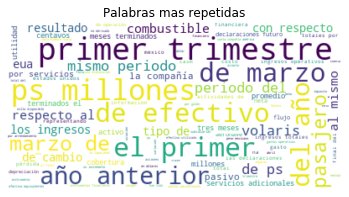

In [17]:
#Utilizamos una nube de palabras para mostrar las palabras mas repetidas
cloud=dataset.texto[0]
for  i in range (1, num_pags):
    cloud= cloud + dataset.texto[i]
wordcloud = WordCloud(stopwords=stopwords.words(idioma),background_color="white",max_words=100).generate(cloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.title("Palabras mas repetidas")
plt.show()

In [18]:
print (stopwords.words(idioma))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [20]:
#Basandonos en la nube de palabras agregamos mas stopwords
nuevas_stopwords = stopwords.words(idioma)
masstopwords = ['ps', 'la', 'de']
nuevas_stopwords.extend(masstopwords)

## Analisis de sentimientos

In [21]:
#Utilizamos Textblob para analisis de sentimientos
from textblob import TextBlob
polaridad= []
subjetividad = []

#Si el dataset esta en un idioma diferente al ingles lo traducimos
if idioma != ('english'):
    for i in range (0, num_pags):
        t=TextBlob(dataset['texto'][i])
        t=t.translate(to="en")
        polaridad.append(t.sentiment.polarity)
        subjetividad.append(t.sentiment.subjectivity)
else:
    for i in range (0, num_pags):
        t=TextBlob(dataset['texto'][i])
        polaridad.append(t.sentiment.polarity)
        subjetividad.append(t.sentiment.subjectivity)

In [22]:
#Creamos nuevas columnas para agregar polaridad y subjetividad al dataset
dataset['polaridad'] = polaridad
dataset['subjetividad'] = subjetividad
pd.set_option('max_colwidth',120)
dataset

,texto,polaridad,subjetividad
0,volaris reporta resultados del primer trimestre de margen de utilidad operativa un incremento de puntos...,0.061859,0.285256
1,la utilidad de operación fue ps millones para el primer trimestre representando una mejoría comparada con l...,0.057719,0.370373
2,si bien nuestro negocio y la industria entera de aerolíneas han comenzado a experimentar impactos adversos mat...,0.020039,0.311601
3,reducción del costo total unitario a pesar de la depreciación del peso en el primer trimestre de el casm y...,0.022576,0.261237
4,adicionalmente durante la compañía estableció coberturas respecto de una parte de su pronóstico de gasto de...,0.066667,0.463194
5,detalle de conferencia telefónica webcast acerca de volaris aerolínea de ultra tarifas base bajas para estimu...,0.093721,0.315666
6,controladora vuela compañía de aviación s a b de c v y subsidiarias indicadores financieros y operativos ci...,0.013462,0.255769
7,controladora vuela compañía de aviación s a b de c v y subsidiarias estados consolidados de resultados ci...,-0.015625,0.270833
8,controladora vuela compañía de aviación s a b de c v y subsidiarias conciliación de ingresos totales por s...,0.030556,0.580556
9,controladora vuela compañía de aviación s a b de c v y subsidiarias estados consolidados de posición financie...,-0.012165,0.372210


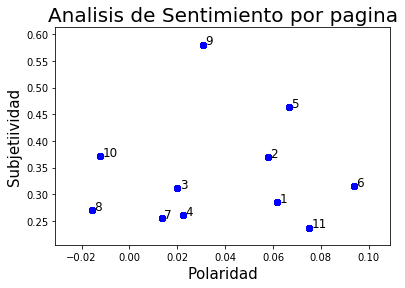

In [23]:
#Mostramos el resultado del analisis de sentimiento en una grafica que muestra el resultado por cda pagina
for i in range (num_pags):
    x = polaridad
    y = subjetividad
    plt.scatter(x, y, color='blue')
    plt.text(x[i]+0.001, y[i], i+1, fontsize=12)

plt.title('Analisis de Sentimiento por pagina', fontsize=20)
plt.xlabel('Polaridad', fontsize=15)
plt.ylabel('Subjetiividad', fontsize=15)
plt.show()

## Modelado de tópicos 

In [25]:
# Inicializamos el coun vectorizer con las stopwords que agregamos
count_vectorizer = CountVectorizer(stop_words= nuevas_stopwords)
count_data = count_vectorizer.fit_transform(dataset['texto'])

In [26]:
# Cargamos la libreira LDA de sk-learn
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Creamos la funcion que mostrara los tpicos encontrados
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopico #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Ajustamos los parametros deseados
number_topics = 3
number_words = 18
# Creamos el modelo LDA
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# MOstramos los topicos encontrados
print("Tópicos encontrados mediante LDA:")
print_topics(lda, count_vectorizer, number_words)

Topicos encontrados mediante LDA:

Topico #0:
efectivo millones ingresos marzo total meses terminados tres financieros compañía pesos pasajero utilidad activos pasivos cobertura instrumentos tipo

Topico #1:
trimestre primer año anterior mismo respecto periodo declaraciones volaris futuro millones ingresos adicionales méxico unidos compañía totales servicios

Topico #2:
operativos pp promedio centavos pesos na casm asm diluida internacional básica doméstico pérdida periodo combustible gastos millones cambio


In [27]:
#COn la libreria pyLDAvis visualizamos los topicos encontrados 
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis
pyLDAvis.display(sklearn_lda.prepare(lda, count_data, count_vectorizer))